In [3]:
os.chdir('/home/xli/Data/xwang/RNA-seq_E13.5_mandible/Tophat_Results/sorted')

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

In [4]:
os.listdir()

df_control = pd.read_csv('Control.quant.IRI.genes.txt', sep="\t", usecols={'gene_id', 'gene_CIR_RPKM', 'gene_CER_RPKM', 'gene_IRI' })
df_mutant = pd.read_csv('Mutant.quant.IRI.genes.txt', sep="\t" , usecols={'gene_id', 'gene_CIR_RPKM', 'gene_CER_RPKM', 'gene_IRI' })
df = df_control.merge(df_mutant, on='gene_id', how='inner', suffixes={'_Control','_Mutant'} ).set_index('gene_id')#.head(1)
df = df[(df['gene_CER_RPKM_Control']> 1.0) & (df['gene_CER_RPKM_Mutant']> 1.0) & (df['gene_IRI_Control'] < 1.0) & (df['gene_IRI_Mutant'] < 1.0)]
df_IRI = df[['gene_IRI_Control', 'gene_IRI_Mutant']]
df_IRI.shape

(10688, 2)

In [7]:
df_IRI = np.log(df_IRI).replace([np.inf, -np.inf], np.nan).dropna()
df_IRI.shape

/home/xli/.conda/envs/py3_lx/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(10610, 2)

P value:
0.0


/home/xli/.conda/envs/py3_lx/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Mann–Whitney U test: P value = 0.00e+00')

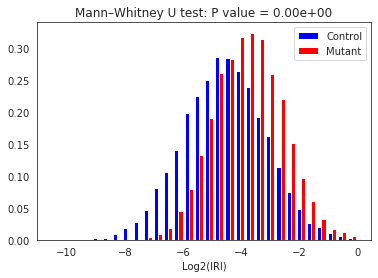

In [9]:
#df_IRI.values

#sns.distplot(df_IRI, color = ['blue','red'],  bins = int(180/5))
#df_IRI.hist(bins=10)
u_statistic, pVal = stats.mannwhitneyu(df_IRI['gene_IRI_Control'], df_IRI['gene_IRI_Mutant'])
print ('P value:')
print (pVal)

plt.hist(df_IRI.values, bins = 30, normed=True,
         color = ['blue','red'], label= ['Control','Mutant'])
plt.legend()
plt.xlabel('Log2(IRI)')
plt.title('Mann–Whitney U test: P value = ' + str("{:0.2e}".format(pVal)))  #str(pVal)) #